In [1]:
# 🔧 Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 📥 Load comments with sentiment and topics
df = pd.read_csv(Path("../data/comments_with_sentiment.csv"))

# 📅 Convert 'timestamp' to datetime format (if not already)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 🧹 Handle missing or invalid dates (if any)
df = df.dropna(subset=['timestamp'])

# Check if 'timestamp' is in datetime format
print(df['timestamp'].dtype)


KeyError: 'timestamp'

In [2]:
print(df.columns)

Index(['video_id', 'title', 'comment', 'cleaned_comment', 'sentiment_score',
       'sentiment_label'],
      dtype='object')


In [3]:
# 📅 Convert 'date' (or the correct column name) to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 🧹 Handle missing or invalid dates (if any)
df = df.dropna(subset=['date'])

# Check if 'date' is in datetime format
print(df['date'].dtype)


KeyError: 'date'

In [4]:
# Use the index as a proxy for time (e.g., each row corresponds to a comment over time)
df['index_time'] = pd.to_datetime(df.index, unit='D', origin='unix')  # Using days from Unix epoch as reference

# Now you can use this 'index_time' column for trend analysis
# Example: Resample by day (this won't make much sense unless you have ordered data)
df.set_index('index_time', inplace=True)


In [ ]:
import numpy as np
import pandas as pd

# Create random dates within a range (e.g., from 2023-01-01 to 2023-12-31)
np.random.seed(42)
df['random_date'] = pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31', freq='D'), len(df)))

df.set_index('random_date', inplace=True)


In [6]:
df['fixed_date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df.set_index('fixed_date', inplace=True)

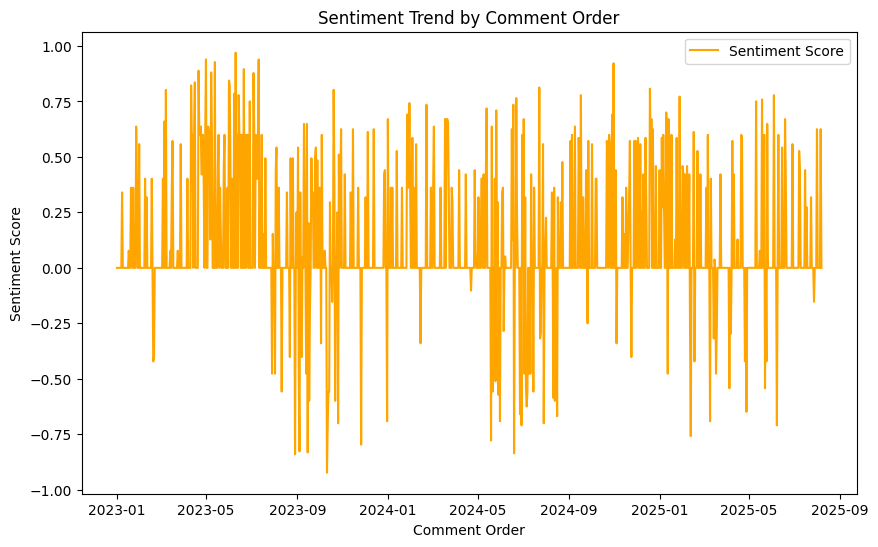

In [7]:
# Using the index as the x-axis, which corresponds to the comment order
df['comment_order'] = df.index

# Now, plotting sentiment trends over the comment order
plt.figure(figsize=(10, 6))
plt.plot(df['comment_order'], df['sentiment_score'], label="Sentiment Score", color="orange")
plt.title("Sentiment Trend by Comment Order")
plt.xlabel("Comment Order")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()
